In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import keras
import seaborn as sns

In [24]:
turbine=pd.read_csv("D:\\ExcelR Assignments\\Neural Networks\\gas_turbines.csv")
turbine.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [25]:
turbine.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [26]:
columns=['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX']

In [27]:
X=np.array(turbine[columns])
Y=np.array(turbine["TEY"])

In [28]:
X

array([[   6.8594, 1007.9   ,   96.799 , ...,   10.605 ,    3.1547,
          82.722 ],
       [   6.785 , 1008.4   ,   97.118 , ...,   10.598 ,    3.2363,
          82.776 ],
       [   6.8977, 1008.8   ,   95.939 , ...,   10.601 ,    3.2012,
          82.468 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 , ...,   10.483 ,    7.9632,
          90.912 ],
       [   7.006 , 1006.8   ,   99.008 , ...,   10.533 ,    6.2494,
          93.227 ],
       [   6.9279, 1007.2   ,   97.533 , ...,   10.583 ,    4.9816,
          92.498 ]])

In [29]:
Y

array([114.7 , 114.72, 114.71, ..., 110.19, 110.74, 111.58])

In [37]:
model = Sequential()
model.add(Dense(50, input_dim=10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(50, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [38]:
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

In [39]:
history=model.fit(X, Y, validation_split=0.5, epochs=50, batch_size=100)

Epoch 1/50
76/76 [==============================] - 1s 5ms/step - loss: 17579.9629 - accuracy: 0.0000e+00 - val_loss: 18407.3496 - val_accuracy: 0.0000e+00
Epoch 2/50
76/76 [==============================] - 0s 3ms/step - loss: 17572.0625 - accuracy: 0.0000e+00 - val_loss: 18407.3496 - val_accuracy: 0.0000e+00
Epoch 3/50
76/76 [==============================] - 0s 3ms/step - loss: 17572.0586 - accuracy: 0.0000e+00 - val_loss: 18407.3496 - val_accuracy: 0.0000e+00
Epoch 4/50
76/76 [==============================] - 0s 3ms/step - loss: 17572.0605 - accuracy: 0.0000e+00 - val_loss: 18407.3496 - val_accuracy: 0.0000e+00
Epoch 5/50
76/76 [==============================] - 0s 3ms/step - loss: 17572.0586 - accuracy: 0.0000e+00 - val_loss: 18407.3496 - val_accuracy: 0.0000e+00
Epoch 6/50
76/76 [==============================] - 0s 3ms/step - loss: 17572.0586 - accuracy: 0.0000e+00 - val_loss: 18407.3496 - val_accuracy: 0.0000e+00
Epoch 7/50
76/76 [==============================] - 0s 3ms/step 

In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

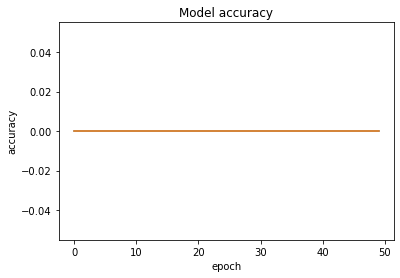

In [41]:
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Model accuracy")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

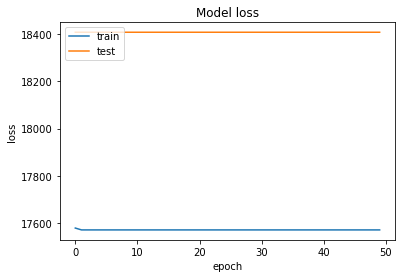

In [42]:
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Model loss")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')